# Objetivo

En este cuaderno, se muestra la técnica de detección de caras de personas sobre un objetos gráfico. Utilizamos bibliotecas básicas de Python y en particular una bliblioteca de procesamiento de imagenes llamada Opencv

In [1]:
# Importando las bibliotecas necesarias
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# Cargar las imágenes


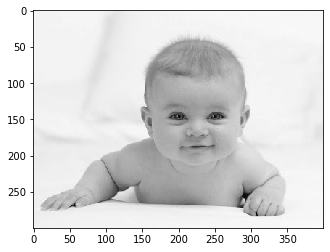

In [2]:
#  Cargar la imagen a ser probada
test_image = cv2.imread('baby1.jpg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
# Convertir a escala de grises como opencv espera que el detector tome en las imágenes de entrada en escala de grises
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
plt.imshow(test_image_gray, cmap='gray')

Como sabemos que OpenCV carga una imagen en formato BGR, debemos convertirla en formato RBG para poder mostrar sus verdaderos colores. Escribamos una pequeña función para eso.

In [3]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Archivos Haar cascade

OpenCV viene con una gran cantidad de clasificadores pre-entrenados. Por ejemplo, hay clasificadores para sonrisa, ojos, cara, etc. Estos vienen en forma de archivos xml y se encuentran en la carpeta `opencv/data/haarcascades/`. Sin embargo, solo para simplificar las cosas, también puedes acceder a ellas desde aquí. Descargue los campos de XML y colóquelos en la carpeta de datos en el mismo directorio de trabajo que el cuaderno jupyter.

### Cargar el clasificador de cara frontal

In [4]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

# Detección de caras

Utilizaremos el módulo detectMultiscale del clasificador. Esta función devolverá las coordenadas (posición x e y más la altura y anchura) de las caras detectadas como Rect (x, y, w, h). 

In [5]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Imprimir el número de caras encontradas
print('Caras encontradas: ', len(faces_rects))

        

Caras encontradas:  1


Nuestro siguiente paso es recorrer todas las coordenadas que devolvió y dibujar rectángulos alrededor de ellos utilizando Open CV. Estaremos dibujando un rectángulo verde con grosor de 2

In [6]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        

Finalmente, mostraremos la imagen original en color para ver si la cara se ha detectado correctamente o no.

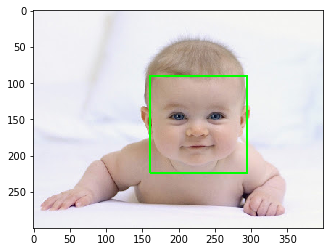

In [7]:
# Convertir la imágen a RGB y mostrarla
plt.imshow(convertToRGB(test_image)) 

### Creamos una función generalizada para todo el proceso de detección de rostros.

In [8]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # Crear una copia de la imagen para evitar cualquier cambio en la original.
    image_copy = test_image.copy()
    
    # Convertir la imagen de prueba a escala de grises, ya que el detector de caras opencv espera imágenes grises
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Aplicando el clasificador haar para detectar caras.
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy

### Probar la función en una nueva imágen




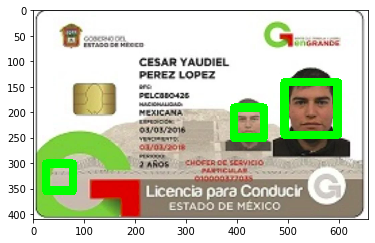

In [9]:
# cargar la imágen
test_image2 = cv2.imread('licencia1.png')

# llamar a la función que detecta las caras
faces = detect_faces(haar_cascade_face, test_image2)

# convertir a RGB y mostrar la imágen
plt.imshow(convertToRGB(faces))


### Probar la función en una foto de grupo

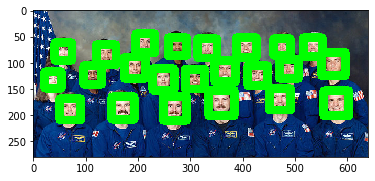

In [10]:
# cargar la imágen
test_image2 = cv2.imread('group.jpg')

# llamar a la función que detecta caras
faces = detect_faces(haar_cascade_face, test_image2)

# convertir la imágen a RGB y mostrarla
plt.imshow(convertToRGB(faces))


### Guardar la imágen procesada

In [11]:
 cv2.imwrite('image1.png',faces)

True